In [1]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/DL/fake-news/train.csv')
df

In [ ]:
X = df.drop('label',axis=1)
X

In [5]:
y = df['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [6]:
df.shape

(20800, 5)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer

In [8]:
df = df.dropna()

In [9]:
df.shape

(18285, 5)

In [10]:
messages = df.copy()

In [11]:
messages.reset_index(inplace=True)

In [12]:
from nltk.corpus import stopwords

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
ps = PorterStemmer()

In [15]:
import re

In [16]:
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub("[^a-zA-Z]", " ", messages['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [19]:
messages['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
18280    Rapper T. I. unloaded on black celebrities who...
18281    When the Green Bay Packers lost to the Washing...
18282    The Macy’s of today grew from the union of sev...
18283    NATO, Russia To Hold Parallel Exercises In Bal...
18284      David Swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object

In [20]:
messages

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
corpus

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer

In [25]:
cv = HashingVectorizer(n_features=5000, ngram_range=(1,3))

In [27]:
X = cv.fit_transform(corpus).toarray()

In [ ]:
X

In [29]:
X.shape

(18285, 5000)

In [30]:
y = messages['label']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [35]:
import numpy as np


In [36]:
import matplotlib.pyplot as plt


In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title = 'Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normlized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  thres = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j] > thres else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
classifier = MultinomialNB()

In [40]:
from sklearn import metrics
import itertools

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,pred)

0.6546810273405137

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)

Confusion matrix without normalization


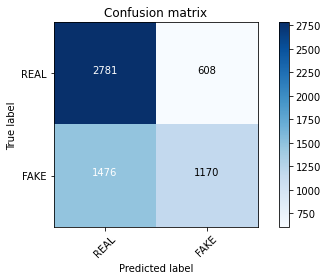

In [ ]:
plot_confusion_matrix(cm, ['REAL', 'FAKE'], normalize=False)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
pac = PassiveAggressiveClassifier()

In [ ]:
pac.fit(X_train, y_train)

In [ ]:
pred = pac.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, pred)

0.6458989229494615

In [ ]:
cm = metrics.confusion_matrix(y_test,pred)

Confusion matrix without normalization


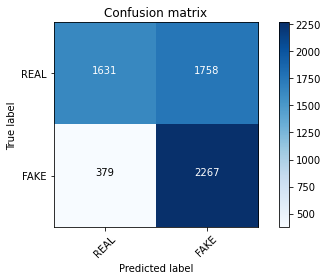

In [ ]:
plot_confusion_matrix(cm,['REAL','FAKE'])

In [ ]:
clf = MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,.1):
  sub_clf = MultinomialNB(alpha=alpha)
  sub_clf.fit(X_train, y_train)
  pred = sub_clf.predict(X_test)
  if metrics.accuracy_score(y_test, pred) > previous_score:
    clf = sub_clf
  print("Alpha {}, Score {}".format(alpha,metrics.accuracy_score(y_test, pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha 0.0, Score 0.644076222038111
Alpha 0.1, Score 0.6531897265948633
Alpha 0.2, Score 0.6553438276719138
Alpha 0.30000000000000004, Score 0.656006628003314
Alpha 0.4, Score 0.6531897265948633
Alpha 0.5, Score 0.6541839270919635
Alpha 0.6000000000000001, Score 0.6546810273405137
Alpha 0.7000000000000001, Score 0.6543496271748136
Alpha 0.8, Score 0.6548467274233637
Alpha 0.9, Score 0.6540182270091135


In [ ]:
feature_names = cv.get_feature_names()
feature_names

In [ ]:
clf.coef_[0]

array([ -5.27716907, -10.54674396,  -8.85214824, ..., -10.54674396,
        -8.14884869,  -9.37667271])

In [ ]:
sorted(zip(clf.coef_[0],feature_names), reverse=True)[:20]

[(-2.8751241942262737, 'the'),
 (-3.1886918538093028, 'to'),
 (-3.4849332473038865, 'of'),
 (-3.6390998017848792, 'in'),
 (-3.8976154975045, 'on'),
 (-3.9121106056209225, 'and'),
 (-3.940243938708205, 'for'),
 (-4.051310580071848, 'is'),
 (-4.432815992817138, 'by'),
 (-4.689128319717803, 'the of'),
 (-4.803384713714584, 'with'),
 (-4.839633698733732, 'it'),
 (-5.008098220866261, 'from'),
 (-5.030183924220073, 'are'),
 (-5.071210644176317, 'you'),
 (-5.085268982550528, 'at'),
 (-5.089999360340053, 'will'),
 (-5.089999360340053, 'be'),
 (-5.123753770244372, 'what'),
 (-5.138576176003893, 'thi')]

TF IDF

In [ ]:
X = df.drop('label', axis=1)
X

In [ ]:
y = df['label']
y

In [ ]:
X.shape, y.shape

((18285, 4), (18285,))

In [ ]:
messages = df.copy()

In [ ]:
messages.head(10)

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [ ]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]', " ", messages['text'][i])
  review = review.lower().split()
  review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)
corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tiv = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
X = tiv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = messages['label']
y

In [ ]:
tiv.get_feature_names()

In [ ]:
tiv.get_params()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
count_df = pd.DataFrame(X_train, columns=tiv.get_feature_names())
count_df

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,pred)

0.8990976210008204

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)

Confusion matrix without normalization


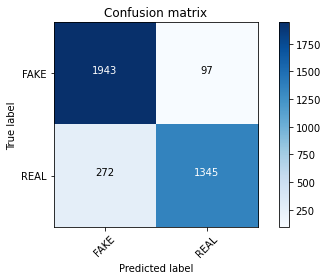

In [ ]:
plot_confusion_matrix(cm, ['FAKE', 'REAL'])